In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
#1.1 Carregue o conjunto de dados, utilizando como nome para as colunas (column_names) o nome dos dados citados acima.


columns=['Posição X', 
         'Posição Y', 
         'sin(theta)', 
         'cos(theta)', 
         'Velocidade X', 
         'Velocidade Y', 
         'Velocidade Angular (theta)', 
         'Posição da Perna Esquerda', 
         'Posição da Perna Direita', 
         'Ação tomada', 
         'Recompensa']

dataset = pd.read_csv('Dataset_lunar_lander_msd_1.csv', 
                 header=0,
                 names=columns)

dataset.describe()

,Posição X,Posição Y,sin(theta),cos(theta),Velocidade X,Velocidade Y,Velocidade Angular (theta),Posição da Perna Esquerda,Posição da Perna Direita,Ação tomada,Recompensa
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.0,319.000000,319.000000
mean,-0.261284,1.207487,-0.191235,0.848472,-0.423802,-0.536888,-0.417617,0.006270,0.0,2.037618,-3.906131
std,0.355957,0.423591,0.483746,0.101391,0.676049,0.833081,0.544512,0.079056,0.0,1.036365,12.444418
min,-0.998415,-0.021675,-0.775714,0.605497,-1.976554,-3.892494,-5.476122,0.000000,0.0,0.000000,-100.000000
25%,-0.537009,1.033986,-0.605157,0.777747,-0.910821,-0.744606,-0.723362,0.000000,0.0,2.000000,-4.042526
50%,-0.201242,1.359330,-0.381933,0.846116,-0.078000,-0.218413,-0.262491,0.000000,0.0,2.000000,-1.745477
75%,-0.016972,1.424816,0.279503,0.939264,0.087120,0.033671,-0.034563,0.000000,0.0,3.000000,-0.484925
max,0.620101,1.852696,0.795848,0.999661,0.396150,0.150921,0.147007,1.000000,0.0,3.000000,3.884261


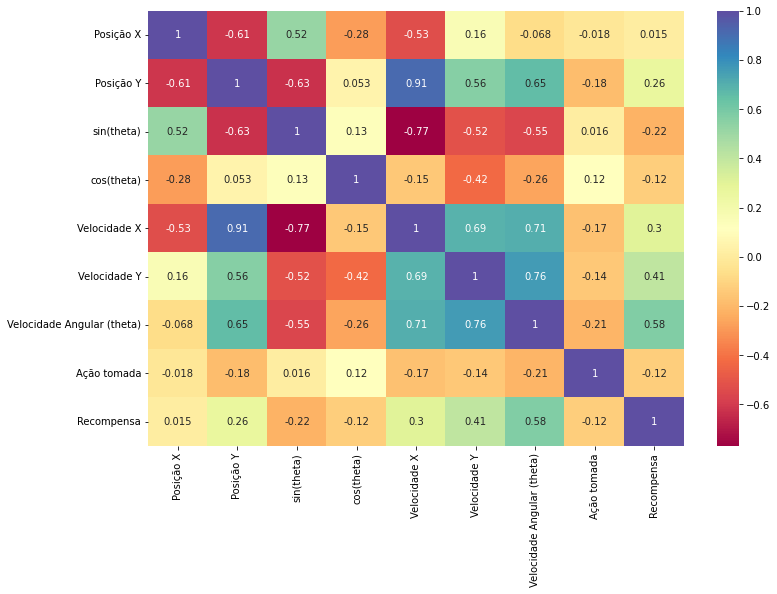

In [4]:
#1.2 Mostre a correlação entre a saída (Recompensa) e, pelo menos, quatro dados à sua escolha:
corr = dataset.drop(columns=['Posição da Perna Esquerda', 'Posição da Perna Direita']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Spectral",annot=True)
plt.show()

In [6]:
#1.3 Prepare o conjunto de dados, separando os dados de treinamento e de teste. Para este caso, não será necessário realizar a normalização dos dados.

X = dataset.drop(columns=['Recompensa'])
y = dataset['Recompensa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [9]:
#1.4 Realize o treinamento por 2000 épocas e apresente o resultado. 

EPOCHS = 2000

def build_model(dataset):
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model(X_train)

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.3, verbose=0)


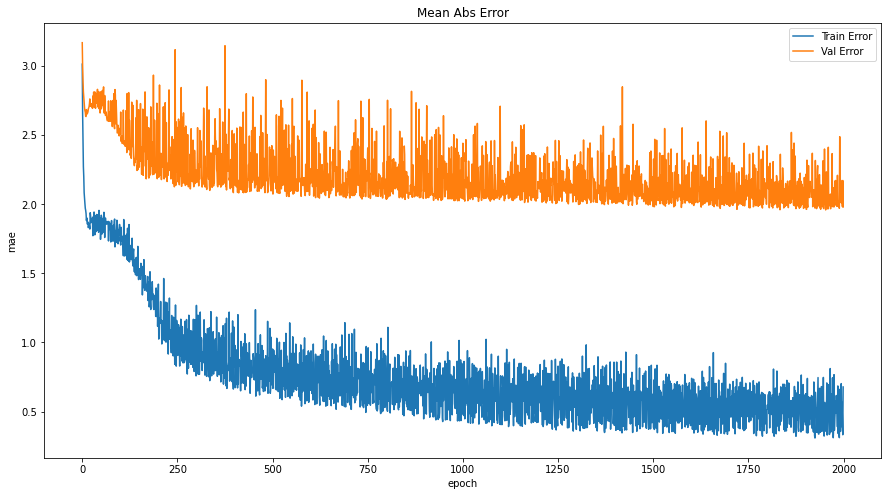

In [12]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.figure(figsize=(15,8))

sns.lineplot(data=hist,
            x='epoch',
            y='mae',
            label='Train Error');
sns.lineplot(data=hist,
            x='epoch',
            y='val_mae',
            label = 'Val Error').set_title("Mean Abs Error");

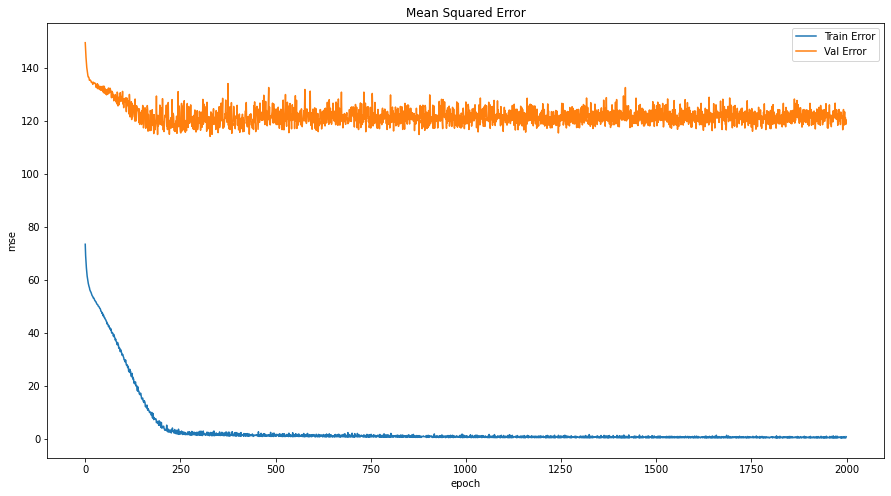

In [13]:
plt.figure(figsize=(15,8))

sns.lineplot(data=hist,
            x='epoch',
            y='mse',
            label='Train Error');
sns.lineplot(data=hist,
            x='epoch',
            y='val_mse',
            label = 'Val Error').set_title("Mean Squared Error");

In [17]:
#1.5 Realizar o treinamento utilizando o método early stop e apresente o resultado:

model_es = build_model(X_train)
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', 
                                           mode='min', 
                                           patience=30,                                             
                                           min_delta=0.01)
history_es = model_es.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.3, verbose=0, callbacks=[early_stop])
hist_es = pd.DataFrame(history_es.history)
hist_es['epoch'] = history_es.epoch

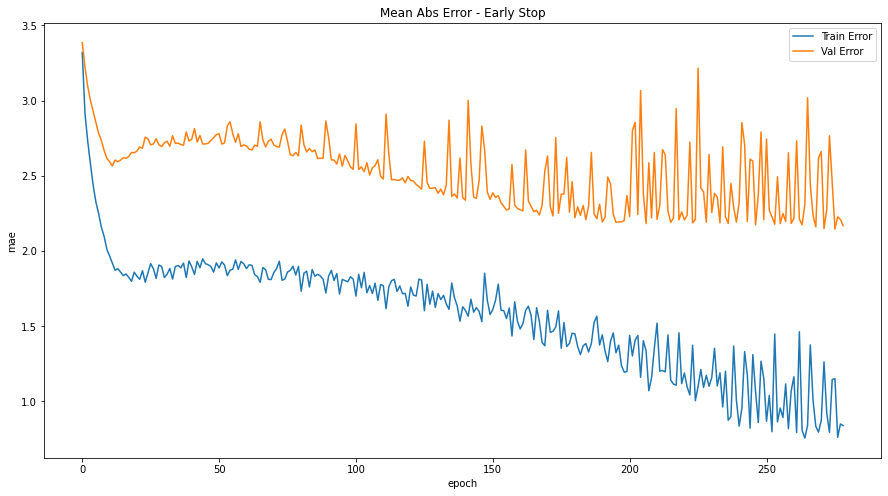

In [18]:
plt.figure(figsize=(15,8))

sns.lineplot(data=hist_es,
            x='epoch',
            y='mae',
            label='Train Error');
sns.lineplot(data=hist_es,
            x='epoch',
            y='val_mae',
            label = 'Val Error').set_title("Mean Abs Error - Early Stop");

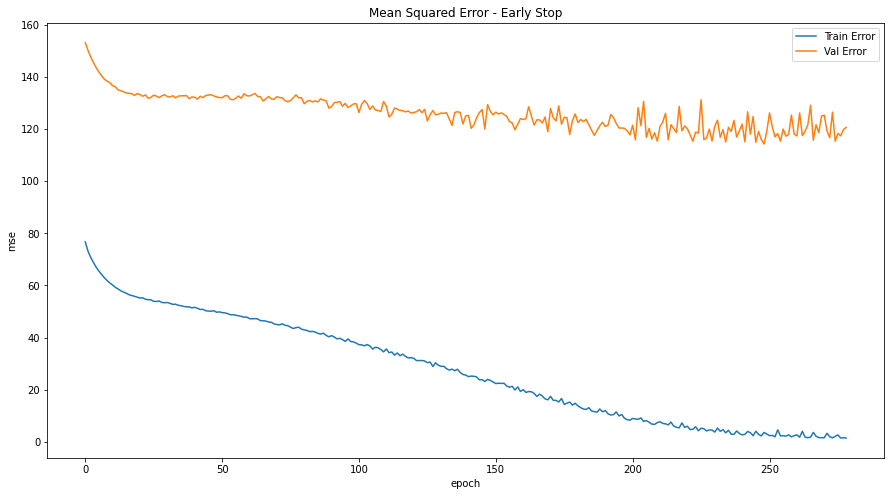

In [19]:
plt.figure(figsize=(15,8))

sns.lineplot(data=hist_es,
            x='epoch',
            y='mse',
            label='Train Error');
sns.lineplot(data=hist_es,
            x='epoch',
            y='val_mse',
            label = 'Val Error').set_title("Mean Squared Error - Early Stop");